In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("spark://10.0.0.201:7077") \
    .appName("Project") \
    .getOrCreate()

In [3]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Dataset Link - https://www.kaggle.com/code/bobirino/predicting-flight-delay/input
#Reading the dataset
data = pd.read_csv('C:/Users/jvidh/Big Data Project/data.csv')
data.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [5]:
#Checking the dimensions of the data
data.shape

(5635978, 65)

In [6]:
#Checking datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635978 entries, 0 to 5635977
Data columns (total 65 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   object 
 1   QUARTER                object 
 2   MONTH                  int64  
 3   DAY_OF_MONTH           object 
 4   DAY_OF_WEEK            object 
 5   FL_DATE                object 
 6   UNIQUE_CARRIER         object 
 7   AIRLINE_ID             int64  
 8   CARRIER                object 
 9   TAIL_NUM               object 
 10  FL_NUM                 object 
 11  ORIGIN_AIRPORT_ID      object 
 12  ORIGIN_AIRPORT_SEQ_ID  int64  
 13  ORIGIN_CITY_MARKET_ID  object 
 14  ORIGIN                 object 
 15  ORIGIN_CITY_NAME       object 
 16  ORIGIN_STATE_ABR       object 
 17  ORIGIN_STATE_FIPS      float64
 18  ORIGIN_STATE_NM        object 
 19  ORIGIN_WAC             object 
 20  DEST_AIRPORT_ID        object 
 21  DEST_AIRPORT_SEQ_ID    object 
 22  DEST_CITY_MARKET_I

In [7]:
#Counting the number of missing values per feature
missing_values = data.isnull().sum()

print('Missing Values:')
print(missing_values[missing_values >= 1])

Missing Values:
TAIL_NUM                 12750
DEST                         1
DEST_STATE_ABR               1
DEP_TIME                 63538
DEP_DELAY                63539
DEP_DELAY_NEW            63539
DEP_DEL15                63540
DEP_DELAY_GROUP          63540
DEP_TIME_BLK                 2
TAXI_OUT                 65523
WHEELS_OFF               65523
WHEELS_ON                67983
TAXI_IN                  67983
CRS_ARR_TIME                 3
ARR_TIME                 67984
ARR_DELAY                79781
ARR_DELAY_NEW            79782
ARR_DEL15                79781
ARR_DELAY_GROUP          79781
ARR_TIME_BLK                 3
CANCELLED                    3
CANCELLATION_CODE      5570003
DIVERTED                     4
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME      79783
AIR_TIME                 79783
FLIGHTS                      5
DISTANCE                     5
DISTANCE_GROUP               5
CARRIER_DELAY          4667538
WEATHER_DELAY          4667538
NAS_DELAY              

In [8]:
#Finding the number of duplicate rows and removing them
duplicates = data.duplicated().sum()

print('Total count of duplicate rows:', duplicates)

data = data.drop_duplicates()

Total count of duplicate rows: 107426


In [9]:
#Checking the dimensions of the data after removing the duplicates
data.shape

(5528552, 65)

In [10]:
#Selecting the relevant and important features
selected_features = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_TIME','CRS_DEP_TIME','ARR_TIME','CRS_ARR_TIME','UNIQUE_CARRIER','FL_NUM',
                    'TAIL_NUM','ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME','AIR_TIME','ARR_DELAY','DEP_DELAY','ORIGIN','DEST','DISTANCE','TAXI_IN',
                    'TAXI_OUT','CANCELLED','CANCELLATION_CODE','DIVERTED','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY',
                    'LATE_AIRCRAFT_DELAY']

data = data[selected_features]
data.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,ARR_TIME,CRS_ARR_TIME,UNIQUE_CARRIER,FL_NUM,...,TAXI_IN,TAXI_OUT,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,6,3,1057.0,1100.0,1432.0,1438.0,AA,43,...,8.0,15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2016,1,7,4,1056.0,1100.0,1426.0,1438.0,AA,43,...,10.0,14.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,8,5,1055.0,1100.0,1445.0,1438.0,AA,43,...,14.0,21.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2016,1,9,6,1102.0,1100.0,1433.0,1438.0,AA,43,...,9.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2016,1,10,7,1240.0,1100.0,1631.0,1438.0,AA,43,...,14.0,20.0,0.0,NaN,0.0,0.0,0.0,47.0,0.0,66.0


In [11]:
#Reading data from the newly created dataset
df = data.sample(100000, random_state = 44)
df = df[df['MONTH'].isin([1,2,3,4])]
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,ARR_TIME,CRS_ARR_TIME,UNIQUE_CARRIER,FL_NUM,...,TAXI_IN,TAXI_OUT,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
798638,2016,2,9,2,1250.0,1250.0,1445.0,1500.0,WN,1519,...,4.0,15.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
550256,2016,2,5,5,1342.0,1345.0,1712.0,1727.0,UA,432,...,6.0,12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1327689,2016,3,10,4,719.0,720.0,1023.0,1023.0,B6,470,...,7.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1674386,2016,4,14,4,1646.0,1650.0,1756.0,1822.0,UA,563,...,13.0,13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
807416,2016,2,12,5,958.0,1000.0,1113.0,1125.0,WN,118,...,5.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#Checking the dimensions of the new dataset
df.shape

(31141, 29)

In [13]:
#Filling the nulls in the Taxi-Out column
df['TAXI_OUT'].fillna(0, inplace = True)

#Filtering out the cancelled flights data
cancelled = df[df['CANCELLED'] == 1]
cancelled.tail()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,CRS_DEP_TIME,ARR_TIME,CRS_ARR_TIME,UNIQUE_CARRIER,FL_NUM,...,TAXI_IN,TAXI_OUT,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
762671,2016,2,1,1,NaN,1935.0,NaN,2305.0,F9,142,...,NaN,0,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
740815,2016,2,16,2,NaN,618.0,NaN,829.0,EV,4292,...,NaN,0,1.0,C,0.0,NaN,NaN,NaN,NaN,NaN
1644339,2016,4,16,6,NaN,1349.0,NaN,1435.0,OO,5730,...,NaN,0,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
82613,2016,1,23,6,NaN,1850.0,NaN,2155.0,AS,729,...,NaN,0,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN
133519,2016,1,23,6,NaN,2114.0,NaN,8.0,NK,992,...,NaN,0,1.0,B,0.0,NaN,NaN,NaN,NaN,NaN


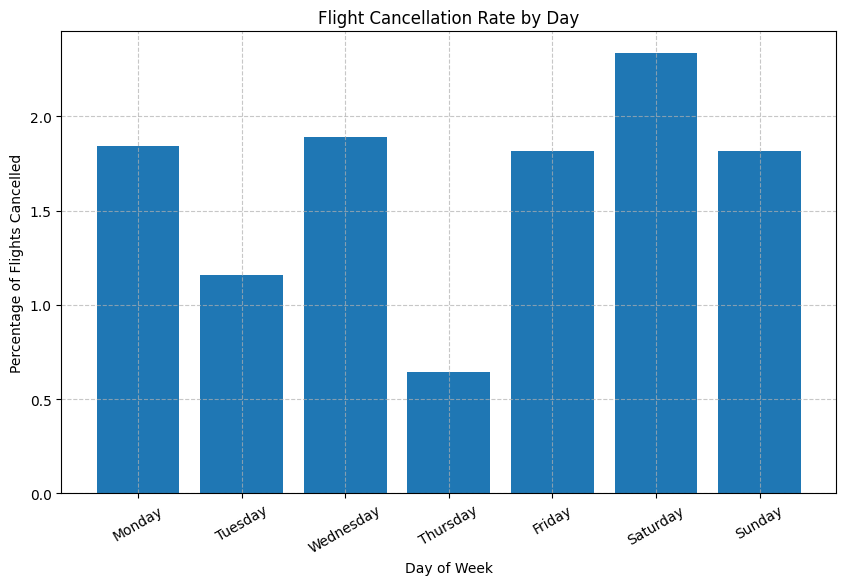

In [14]:
#Converting Cancelled column to numeric where 1 means Cancelled and 0 means otherwise
df['CANCELLED'] = pd.to_numeric(df['CANCELLED'], errors = 'coerce').fillna(0).astype(int)

#Converting the Day_Of_Week column to numeric where 1-7 means Mon-Sun
df['DAY_OF_WEEK'] = pd.to_numeric(df['DAY_OF_WEEK'], errors = 'coerce')

#Calculating the cancellation rate per day by performing the average of the Cancelled column
cancellation_rate_per_day = df.groupby('DAY_OF_WEEK')['CANCELLED'].mean() * 100

#X-Axis Labels
days = cancellation_rate_per_day.index
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Plotting the percentage of flights cancelled by day of week
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(days, cancellation_rate_per_day, align = 'center')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(days)
ax.set_xticklabels(day_labels, rotation = 30)
ax.grid(True, linestyle = '--', alpha = 0.7)
plt.title('Flight Cancellation Rate by Day')
plt.show()

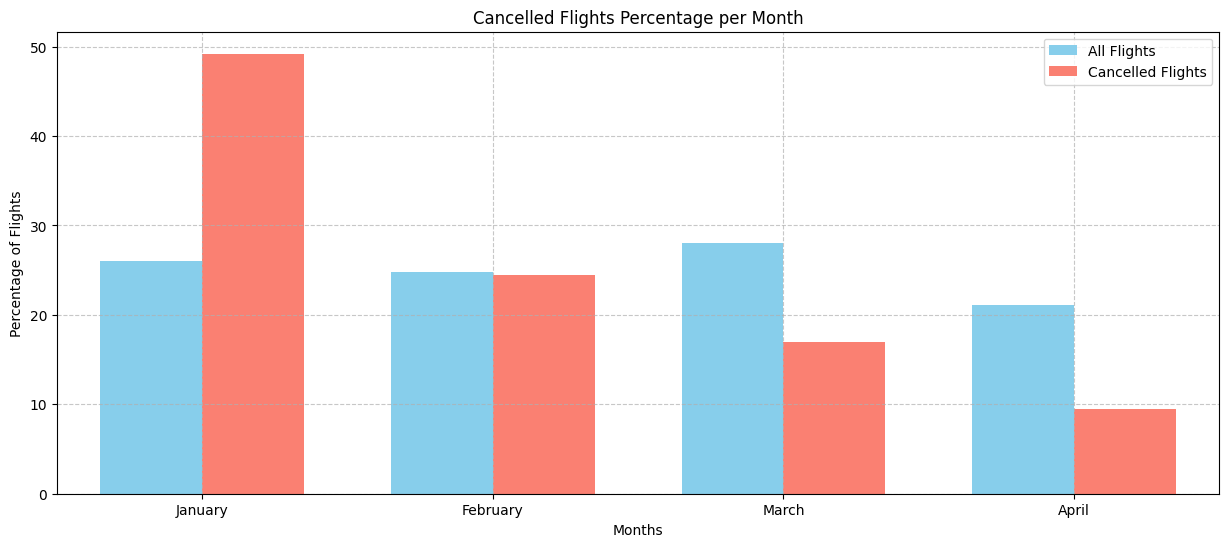

In [15]:
#Computing the percentage of total flights and percentage of cancelled flights
all_flights_count = df['MONTH'].value_counts(normalize = True).sort_index() * 100
cancelled_flights_count = cancelled['MONTH'].value_counts(normalize = True).sort_index() * 100

#Selecting only the first 4 months of data
months = [1,2,3,4]
all_flights_count = all_flights_count.reindex(months, fill_value = 0)
cancelled_flights_count = cancelled_flights_count.reindex(months, fill_value = 0)

#Index and Bar Width definition
index = range(len(months))
bar_width = 0.35

#Plotting percentage of all flights and cancelled flights per month
fig, ax = plt.subplots(figsize = (15,6))
ax.bar([i - bar_width / 2 for i in index], all_flights_count, bar_width, color = 'skyblue', label = 'All Flights')
ax.bar([i + bar_width / 2 for i in index], cancelled_flights_count, bar_width, color = 'salmon', label = 'Cancelled Flights')
ax.set_xticks(index)
ax.set_xticklabels(['January','February','March','April'])
ax.set_xlim(-0.5, 3.5)
ax.set_xlabel('Months')
ax.set_ylabel('Percentage of Flights')
ax.set_title('Cancelled Flights Percentage per Month')
ax.legend()
ax.grid(True, linestyle = '--', alpha = 0.7)
plt.show()


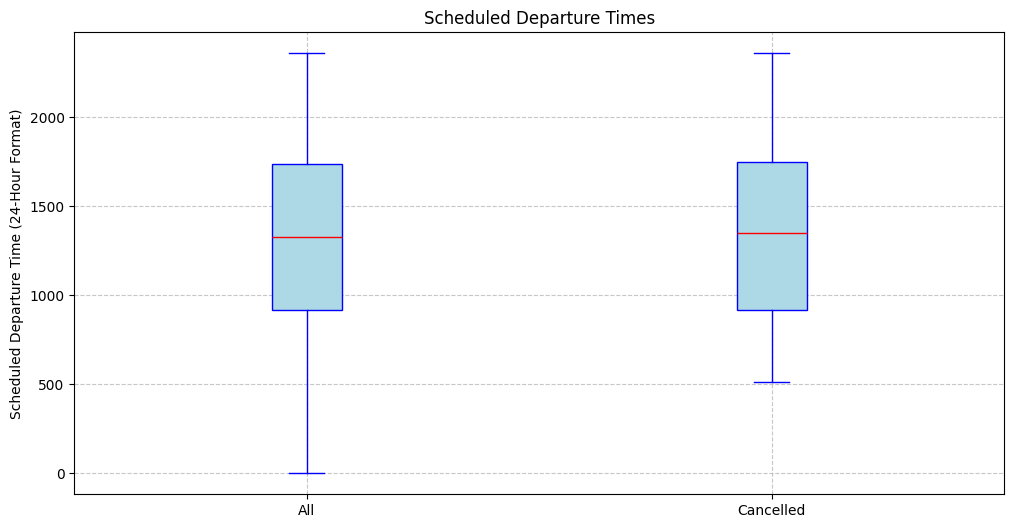

In [16]:
#Selecting the data needed to plot
data_to_plot = [df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']]

#Configuring the boxplots
fig, ax = plt.subplots(figsize = (12,6))
ax.boxplot(data_to_plot, labels = ['All', 'Cancelled'], patch_artist = True, boxprops = dict(facecolor = 'lightblue', color = 'blue'),
          medianprops = dict(color = 'red'), whiskerprops = dict(color = 'blue'), capprops = dict(color = 'blue'))
ax.set_title('Scheduled Departure Times')
ax.grid(True, linestyle = '--', alpha = 0.7)
ax.set_ylabel('Scheduled Departure Time (24-Hour Format)')
plt.show()

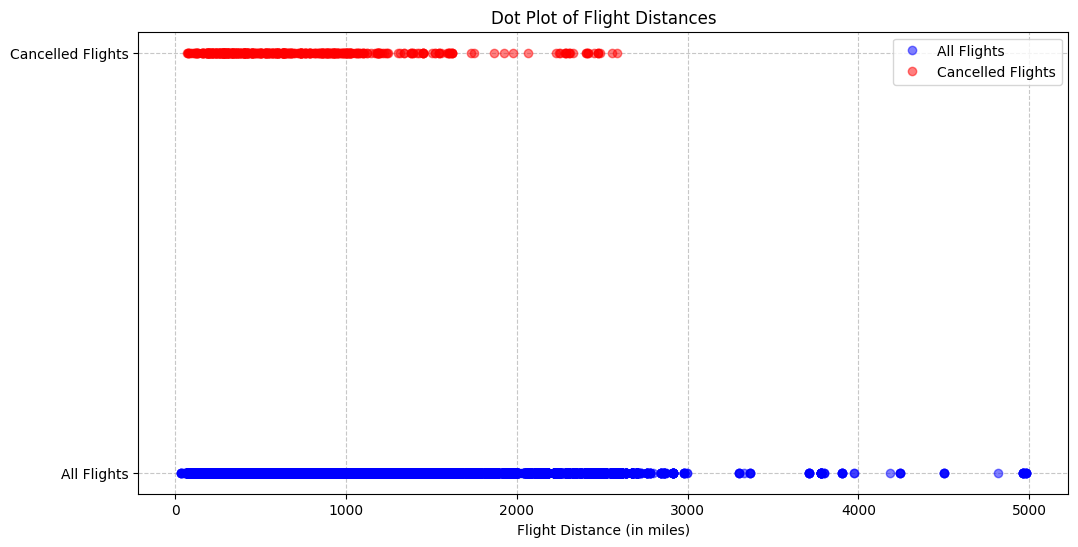

In [17]:
#Plotting the flight distances of cancelled flights and all flights on a Dot Plot
plt.figure(figsize = (12,6))
plt.plot(df['DISTANCE'], [1]*len(df), 'o', alpha = 0.5, label = 'All Flights', color = 'blue')
plt.plot(cancelled['DISTANCE'], [2]*len(cancelled), 'o', alpha = 0.5, label = 'Cancelled Flights', color = 'red')
plt.yticks([1,2], ['All Flights', 'Cancelled Flights'])
plt.title('Dot Plot of Flight Distances')
plt.xlabel('Flight Distance (in miles)')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.show()

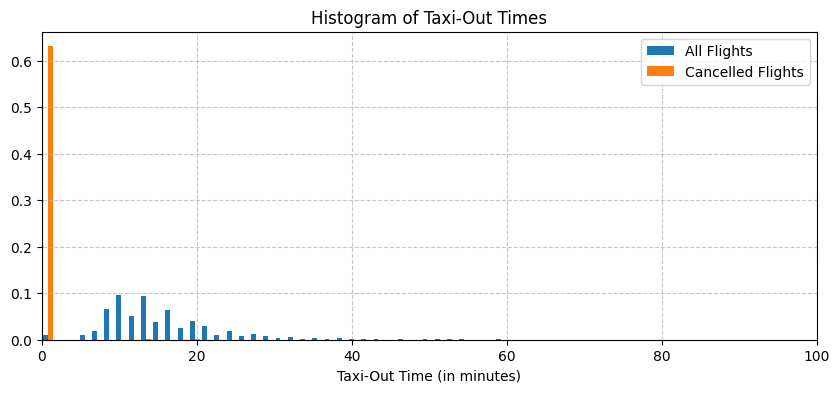

In [18]:
#Converting Taxi-Out column into numeric
df['TAXI_OUT'] = pd.to_numeric(df['TAXI_OUT'], errors = 'coerce')
cancelled['TAXI_OUT'] = pd.to_numeric(cancelled['TAXI_OUT'], errors = 'coerce')

#Dropping the null values
df = df.dropna(subset = ['TAXI_OUT'])
cancelled = cancelled.dropna(subset = ['TAXI_OUT'])

#Plotting the Taxi-Out times of all flights and cancelled flights on a Histogram
fig, ax = plt.subplots(figsize = (10,4))
ax.hist([df['TAXI_OUT'], cancelled['TAXI_OUT']], density = True, bins = 100, label = ['All Flights', 'Cancelled Flights'])
ax.set_xlim(0, 100)
ax.set_xlabel('Taxi-Out Time (in minutes)')
ax.set_title('Histogram of Taxi-Out Times')
ax.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.show()

In [19]:
#Computing the sum of the combined delay based on various delays
df['combined_delay'] = (df['CARRIER_DELAY'] + df['WEATHER_DELAY'] + df['NAS_DELAY'] 
                        + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY'])

#Excluding the null values
delayed_flights = df[~np.isnan(df['combined_delay'])]

#Computing the average delay for each reason
avg_carrier_delay = delayed_flights.groupby('UNIQUE_CARRIER')['CARRIER_DELAY'].mean()
avg_weather_delay = delayed_flights.groupby('UNIQUE_CARRIER')['WEATHER_DELAY'].mean()
avg_nas_delay = delayed_flights.groupby('UNIQUE_CARRIER')['NAS_DELAY'].mean()
avg_security_delay = delayed_flights.groupby('UNIQUE_CARRIER')['SECURITY_DELAY'].mean()
avg_late_aircraft_delay = delayed_flights.groupby('UNIQUE_CARRIER')['LATE_AIRCRAFT_DELAY'].mean()

#Stacking the values for the plot
base_weather = avg_carrier_delay.values
base_nas = base_weather + avg_weather_delay.values
base_security = base_nas + avg_nas_delay.values
base_late = base_security + avg_security_delay.values

#Carrier Codes Labels
carriers = avg_carrier_delay.index.values

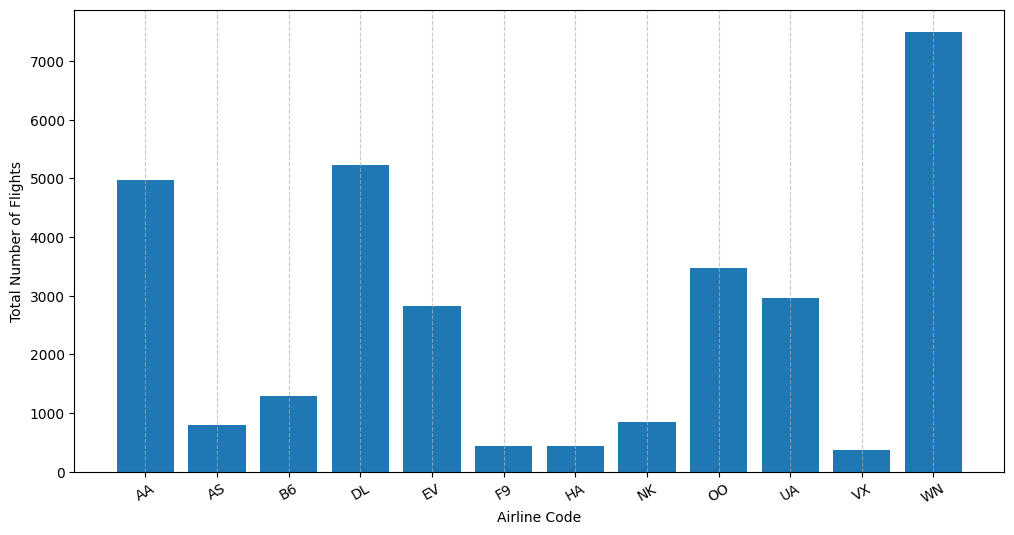

In [20]:
#Computing the total number of flights per carrier
flights_per_carrier = df['UNIQUE_CARRIER'].value_counts().sort_index()

#Plotting the number of flights per carrier
fig, ax = plt.subplots(figsize = (12,6))
carriers = flights_per_carrier.index.values
ax.set_xticks(np.arange(len(carriers)))
ax.set_xticklabels(carriers, rotation = 30)
ax.bar(np.arange(len(carriers)), flights_per_carrier.values, align = 'center')
ax.set_ylabel('Total Number of Flights')
ax.set_xlabel('Airline Code')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

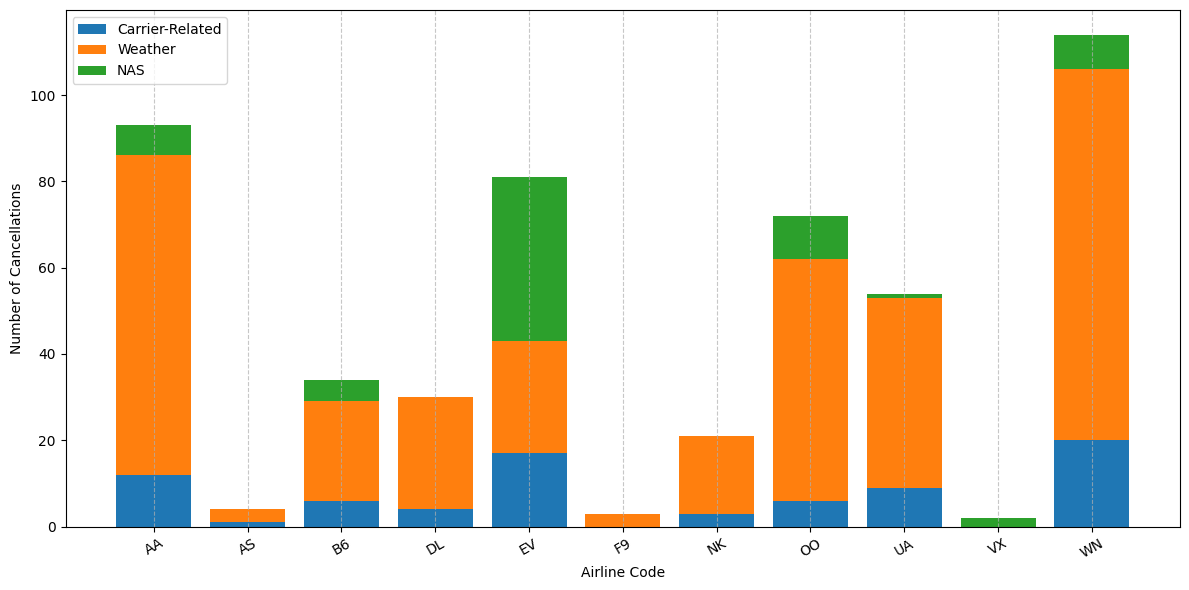

In [21]:
#Grouping the flights based on carrier and cancellation code
cancelled_summary = cancelled.groupby(['UNIQUE_CARRIER', 'CANCELLATION_CODE']).size().unstack(fill_value = 0)

#Defining the bars for each type of delay for the plot
carrier_base = cancelled_summary.get('A', 0).values
weather_base = carrier_base + cancelled_summary.get('B', 0).values
nas_base = weather_base + cancelled_summary.get('C', 0).values

carriers = cancelled_summary.index.values

#Plotting the number of cancellations per carrier
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xticks(np.arange(len(carriers)))
ax.set_xticklabels(carriers, rotation = 30)
ax.bar(np.arange(len(carriers)), cancelled_summary.get('A', 0).values, align = 'center', label = 'Carrier-Related')
ax.bar(np.arange(len(carriers)), cancelled_summary.get('B', 0).values, align = 'center', bottom = carrier_base, label = 'Weather')
ax.bar(np.arange(len(carriers)), cancelled_summary.get('C', 0).values, align = 'center', bottom = weather_base, label = 'NAS')
ax.set_xlabel('Airline Code')
ax.set_ylabel('Number of Cancellations')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
df['total_delay'] = df['ARR_DELAY'].fillna(0) + df['DEP_DELAY'].fillna(0)

In [23]:
#Calculating the total flights per carrier
total_flights_by_carrier = df['UNIQUE_CARRIER'].value_counts()

#Calculating the cancelled flights per carrier
cancelled_flights_by_carrier = df.groupby('UNIQUE_CARRIER')['CANCELLED'].sum()

#Calculating the diverted flights per carrier
diverted_flights_by_carrier = df.groupby('UNIQUE_CARRIER')['DIVERTED'].sum()

#Computing the average airtime by carrier
avg_airtime_by_carrier = df.groupby('UNIQUE_CARRIER')['AIR_TIME'].mean()

#Computing the average distance travelled by carrier
avg_distance_by_carrier = df.groupby('UNIQUE_CARRIER')['DISTANCE'].mean()

#Computing the average delay by carrier
avg_delay_by_carrier = df.groupby('UNIQUE_CARRIER')['total_delay'].mean()

#Computing the average taxi-in and taxi-out times of each carrier
avg_taxi_in_by_carrier = df.groupby('UNIQUE_CARRIER')['TAXI_IN'].mean()
avg_taxi_out_by_carrier = df.groupby('UNIQUE_CARRIER')['TAXI_OUT'].mean()

#Calculating the cancellation percentage by carrier
cancelled_percentage_by_carrier = 100 * (cancelled_flights_by_carrier / total_flights_by_carrier)

#Labeling the carriers
carrier_labels = {
    'AA' : 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'DL': 'Delta Airlines',
    'EV': 'Atlantic Southeast Airlines',
    'F9': 'Frontier Airlines',
    'HA': 'Hawaiian Airlines',
    'NK': 'Northwest Airlines',
    'OO': 'Skywest Airlines',
    'UA': 'United Airlines',
    'VX': 'Mesa Airlines',
    'WN': 'Southwest Airlines'
}

#Mapping the carrier codes with labels
carrier_names_series = pd.Series(carrier_labels).reindex(total_flights_by_carrier.index)

#Combining all metrics into a single dataframe
summary_metrics = pd.DataFrame({
    'Carrier Name': carrier_names_series,
    'Total Flights': total_flights_by_carrier,
    'Cancelled Flights': cancelled_flights_by_carrier,
    'Percent Cancelled': cancelled_percentage_by_carrier,
    'Diverted Flights': diverted_flights_by_carrier,
    'Average Flight Time (minutes)': avg_airtime_by_carrier,
    'Average Flight Distance (miles)': avg_distance_by_carrier,
    'Average Flight Delay (minutes)': avg_delay_by_carrier,
    'Average Taxi-In (minutes)': avg_taxi_in_by_carrier,
    'Average Taxi-Out (minutes)': avg_taxi_out_by_carrier
})

#Summary of all the metrics
summary_metrics = summary_metrics.reset_index()
summary_metrics

,UNIQUE_CARRIER,Carrier Name,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-In (minutes),Average Taxi-Out (minutes)
0,AA,American Airlines,4978,93,1.868220,13.0,139.433087,1026.455605,8.938128,8.739095,17.627360
1,AS,Alaska Airlines,788,4,0.507614,3.0,163.248399,1240.095178,-3.799492,6.542092,15.219543
2,B6,JetBlue Airways,1287,34,2.641803,4.0,146.307446,1063.548563,28.546232,6.144569,16.976690
3,DL,Delta Airlines,5236,30,0.572956,7.0,117.802654,862.927617,5.704545,6.975989,17.552712
4,EV,Atlantic Southeast Airlines,2828,81,2.864215,10.0,70.033613,436.361740,11.289604,7.366485,16.441301
5,F9,Frontier Airlines,444,3,0.675676,0.0,135.816327,1017.623874,7.315315,9.233560,16.414414
6,HA,Hawaiian Airlines,442,0,0.000000,0.0,77.438914,564.576923,-3.237557,6.710407,11.128959
7,NK,Northwest Airlines,847,21,2.479339,0.0,130.966102,965.890201,30.489965,9.633172,14.236128
8,OO,Skywest Airlines,3473,72,2.073136,17.0,76.031915,498.131299,12.785776,6.735710,18.803916
9,UA,United Airlines,2953,54,1.828649,3.0,160.903315,1234.678632,9.143244,8.419255,16.314934


In [24]:
#Encoding the data to improve the performance of the models
df['Carrier Mean Delay'] = df['total_delay'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier Mean Distance'] = df['DISTANCE'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Carrier Cancellations'] = df['CANCELLED'].groupby(df['UNIQUE_CARRIER']).transform('mean')
df['Origin Cancellations'] = df['CANCELLED'].groupby(df['ORIGIN']).transform('mean')
df['Destination Cancellations'] = df['CANCELLED'].groupby(df['DEST']).transform('mean')

df['Origin Taxi-Out'] = df['TAXI_OUT'].groupby(df['ORIGIN']).transform('mean')
df['Origin Delay'] = df['total_delay'].groupby(df['ORIGIN']).transform('mean')

df['ORIGIN'] = df['ORIGIN'].astype('category').cat.codes
df['DEST'] = df['DEST'].astype('category').cat.codes
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].astype('category').cat.codes
df.fillna(0, inplace = True)

In [25]:
#Importing the necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
#Defining the features and the target variable
X_cancelled = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'DISTANCE', 'Carrier Mean Distance', 'Origin Delay',
        'Origin Taxi-Out']]
y_cancelled = df['CANCELLED']

#Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_cancelled, y_cancelled, test_size = 0.2, random_state = 42)

#Using SVM model and evaluating its performance
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print('\nSupport Vector Machine (SVM) -')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine (SVM) -
Accuracy: 0.9845882164071279
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6133
           1       0.00      0.00      0.00        96

    accuracy                           0.98      6229
   macro avg       0.49      0.50      0.50      6229
weighted avg       0.97      0.98      0.98      6229

[[6133    0]
 [  96    0]]
